In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import numpy as np
df=pd.DataFrame({'MAX':[39,41,43,47,49,51,45,38,37,39,27,25],'MIN':[21,23,27,28,32,35,31,28,21,19,17,18],'MONTH':[i for i in range(1,13)]})

In [3]:
df

,MAX,MIN,MONTH
0,39,21,1
1,41,23,2
2,43,27,3
3,47,28,4
4,49,32,5
5,51,35,6
6,45,31,7
7,38,28,8
8,37,21,9
9,39,19,10


In [25]:
def yearly_temps(times, avg, ampl, time_offset):
    return (avg
            + ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))

res_max, cov_max = curve_fit(yearly_temps, df['MONTH'],
                                      df['MAX'], [20, 10, 0])
res_min, cov_min = curve_fit(yearly_temps, df['MONTH'],
                                      df['MIN'], [-40, 20, 0])

In [27]:
res_max

array([40.08333334, -9.62622624,  0.80123975])

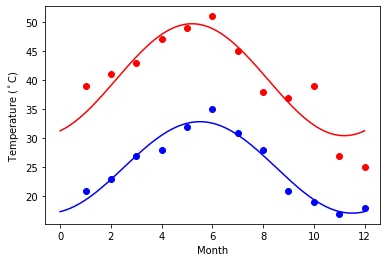

In [26]:
days = np.linspace(0, 12, num=365)

plt.figure()
plt.plot(df['MONTH'], df['MAX'], 'ro')
plt.plot(days, yearly_temps(days, *res_max), 'r-')
plt.plot(df['MONTH'],df['MIN'], 'bo')
plt.plot(days, yearly_temps(days, *res_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')

plt.show()

In [28]:


url = 'https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv'
titanic = pd.read_csv(url)
titanic.head()


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [35]:
sex=pd.get_dummies(titanic['sex'],drop_first=True)

In [36]:
sex

,male
0,0
1,1
2,0
3,1
4,0
...,...
1305,0
1306,1
1307,1
1308,1


In [49]:
sex=titanic['sex'].astype('category')


In [47]:
sex

0       female
1         male
2       female
3         male
4       female
         ...  
1305    female
1306      male
1307      male
1308      male
1309       NaN
Name: sex, Length: 1310, dtype: category
Categories (2, object): ['female', 'male']

In [51]:
sex=sex.cat.codes

Text(0.5, 1.0, 'Male/Female Proportion')

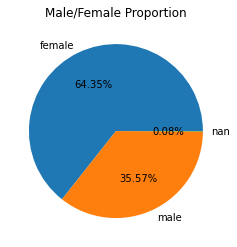

In [59]:
plt.pie(sex.value_counts(), labels = titanic['sex'].unique(),autopct='%1.2f%%')
plt.title('Male/Female Proportion')

Text(0, 0.5, 'age')

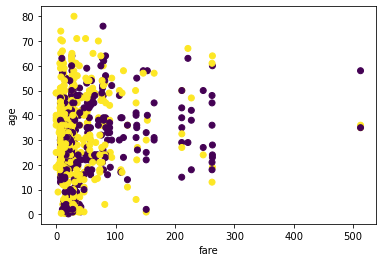

In [61]:
plt.scatter(titanic['fare'],titanic['age'],c=sex)
plt.xlabel('fare')
plt.ylabel('age')